<a href="https://colab.research.google.com/github/cbroker1/text-as-data/blob/master/TAD_Week_3_Broker_Carl_1_of_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] In 1-2 paragraphs, identify a research question answerable with New York Times data, describe why it is interesting, and briefly explain how New York Times data can address it. Use the approach in the provided code: compare the number of hits you get 

[2] Collect the data relevant to the question you motivate above, and answer the following questions:

(a) How many hits do you get in a given year range for your search query?

(b) Read some of the headlines you get from each query (there are ten include with each search). Does it seem like your search queries are retrieving articles that are relevant to the research question you chose?

In [0]:
#install/load packages
system("apt-get install libpoppler-cpp-dev")
install.packages('httr')
install.packages('yaml')
install.packages('jsonlite')
install.packages('dplyr')
library(httr)
library(yaml)
library(jsonlite)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [0]:
# set api key
apikey <- 'VASC5oMAgQHaQK5sTm5IBPR5DaWjwKv7'

In [0]:
#test connection to nyt api
base_url <- "http://api.nytimes.com/svc/search/v2/articlesearch.json"
r <- GET(base_url, query=list(q="Donald Trump","api-key"=apikey))
r

Response [http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Donald%20Trump&api-key=VASC5oMAgQHaQK5sTm5IBPR5DaWjwKv7]
  Date: 2020-06-14 15:12
  Status: 200
  Content-Type: application/json;charset=UTF-8
  Size: 200 kB


In [0]:
# frequency count of 'Donald Trump' mentions, aggregrated per month.


nyt_count <- function(q, date1, date2){
  r <- GET(base_url, query=list(q=q,
                                "api-key"=apikey,
                                "begin_date"=date1,
                                "end_date"=date2))
  json <- content(r, "parsed")
  ## if there is no response
  while (r$status_code!=200){
    Sys.sleep(6) # wait a couple of seconds
    # try again:
    r <- GET(base_url, query=list(q=q,
                  "api-key"=apikey,
                  "begin_date"=date1,
                  "end_date"=date2))
    json <- content(r, "parsed")
  }
  return(json$response$meta$hits)
}

nyt_dates_count <- function(q, init, end, by){
  # sequence of dates to loop over
  dates <- seq(from=init, to=end, by=by)
  dates <- format(dates, "%Y%m%d") # changing format to match NYT API format
  counts <- rep(NA, length(dates)-1)
  # loop over periods
  for (i in 1:(length(dates)-1)){ ## note the -1 here
    # information message to track progress
    message(dates[i])
    # retrieve count
    counts[i] <- nyt_count(q=q, date1=dates[i],
                           date2=dates[i+1])
  }
  # improving this as well so that it returns a data frame
  df <- data.frame(date = as.Date(dates[-length(dates)], format="%Y%m%d"), count = counts)
  return(df)
}

In [0]:
counts <- nyt_dates_count(q="Donand Trump", init = as.Date("2020/01/01"), 
                          end = as.Date("2020/07/13"), by="month")

20200101

20200201

20200301

20200401

20200501

20200601



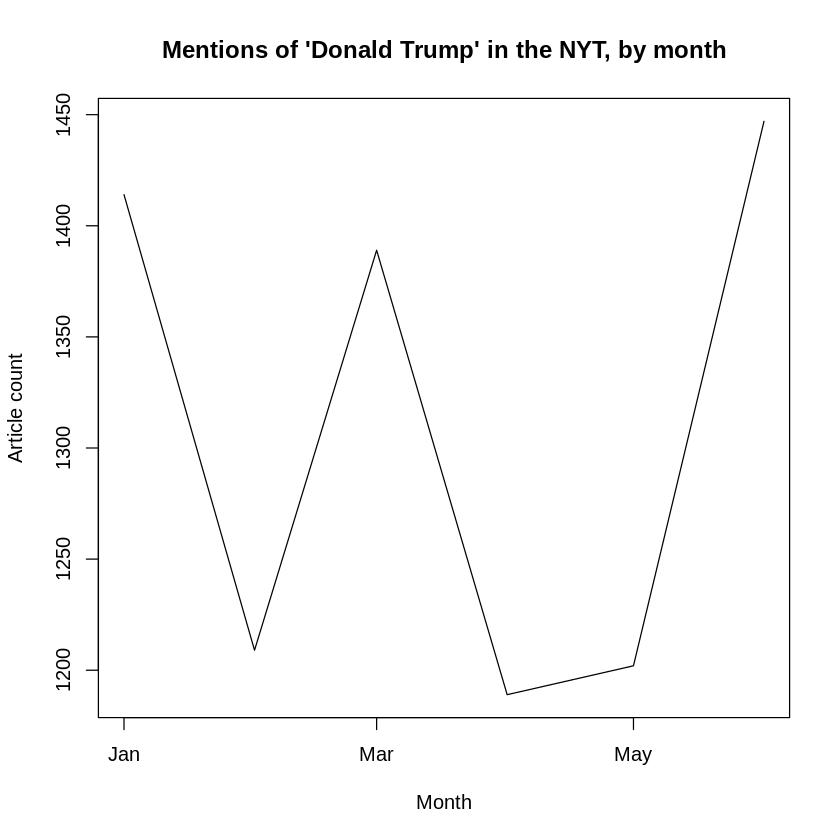

In [0]:
# plot frequency results
plot(counts$date, counts$count, type="l", main="Mentions of 'Donald Trump' in the NYT, by month",
     xlab="Month", ylab="Article count")

In [0]:
# pull all docs that mention 'Donald Trump' from January 2020 to June 2020
nyt_api <- 'VASC5oMAgQHaQK5sTm5IBPR5DaWjwKv7'
nyt_articlesearch_url <- 
  "https://api.nytimes.com/svc/search/v2/articlesearch.json"

query_list <- 
  list(
    `api-key` = nyt_api,
    'begin_date' = 20200101,
    'end_date' = 20200613, 
    q = "Donald Trump"
  )

In [0]:
# get counts
r <- GET(nyt_articlesearch_url, query = query_list)
status_code(r)
content(r)$response$meta
docs <- content(r)$response$docs
writeLines(content(r, 'text'), con=file("dt3.json"))

[1] 200

$hits
[1] 7553

$offset
[1] 0

$time
[1] 304

q=q,
                  "api-key"=apikey,
                  "begin_date"=date1,
                  "end_date"=date2

In [0]:
#inspect counts
hits <- content(r)$response$meta$hits
hits

[1] 7553

In [0]:
#format pages
pages <- 0:(ceiling(hits/10) - 1)

In [0]:
# generate json urls: 

# (this took 4811 seconds) 
requests <- 
  lapply(pages, function(x, query_list) {
    new_query_list <- c(query_list, page = x)
    ## wait to avoid being rate-limited
    Sys.sleep(6)
    r <- GET(nyt_articlesearch_url, query = new_query_list)
  }, query_list = query_list)

In [0]:
# clean: remove bad urls
requests_ok <- requests[lapply(requests, status_code) == 200]

In [0]:
# send results to a .txt
capture.output(requests_ok, file = "urls.txt")

# save that .txt to your desktop

In [0]:
# click below for part 2 in python

https://colab.research.google.com/drive/1w4jb7IOhEFU5-1IRBt6LUHzmuuiq6CJ8?usp=sharing